In this document, Random Forest regression model is implemented to predict chronological age  using the GSE55763 dataset. This data set contains beta values of 100 CpG sites that are used as predictors.

In [64]:
#Load require packages
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Load the data set (beta values)

In [50]:
df = pd.read_csv("GSE55763_100_imputed.csv", index_col=0)

In [52]:
df.head(3) # see first 3 rows

,gender,age,cg00397989,cg01963906,cg00245957,cg00647859,cg01939891,cg04105597,cg03966708,cg04155855,...,cg00987890,cg00103855,cg03962463,cg00300999,cg03337430,cg03104467,cg03034759,cg01001097,cg00575342,cg01423098
X,,,,,,,,,,,,,,,,,,,,,
GSM1343050,M,57.9,0.946047,0.952094,0.958683,0.945851,0.957025,0.945336,0.948224,0.954312,...,0.947045,0.952795,0.967448,0.927704,0.941048,0.893524,0.925687,0.936157,0.943935,0.889623
GSM1343051,M,42.0,0.936366,0.942797,0.970973,0.964335,0.932466,0.935040,0.930569,0.965630,...,0.934667,0.935070,0.900782,0.934775,0.933281,0.950018,0.918946,0.906528,0.892992,0.934986
GSM1343052,M,47.4,0.953729,0.959984,0.933028,0.949747,0.964095,0.929832,0.950267,0.935104,...,0.955600,0.937804,0.914671,0.937891,0.938642,0.888024,0.927637,0.911131,0.912272,0.928465


In [56]:
cpg_cols = df.columns.difference(["gender", "age"])
X = pd.concat([df[cpg_cols], pd.get_dummies(df["gender"], drop_first=True)], axis=1)  #Predictors
y = df["age"] # outcome variable

In [58]:
# Split data set: 80% training and  20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=500
)

Train Random Forest

In [60]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=500
)     # random_state= set seed for reproducibility
rf.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Metrics

In [66]:
y_pred = rf.predict(X_test)
#R2
r2 = rf.score(X_test, y_test)
# MAE
mae = mean_absolute_error(y_test, y_pred)
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.86
MAE: 2.91
RMSE: 3.66


R² of 0.86 indicates that approximately 86% of the variance in chronological age is explained by the model. 
MAE of 2.91 years shows that, on average, the predicted age deviates from the actual age by about 3 years. 
RMSE of 3.66 years reflects the overall magnitude of prediction errors, giving slightly more weight to larger deviations.

In this part, SHAP values are computed to interpret the Random Forest model, showing how much each feature (CpG or covariate) contributes to increasing or decreasing the predicted age for each sample.

In [69]:
# SHAP values on test set 
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

Summary plot for the test set: tvisualizes the impact of each CpG on the model’s predictions

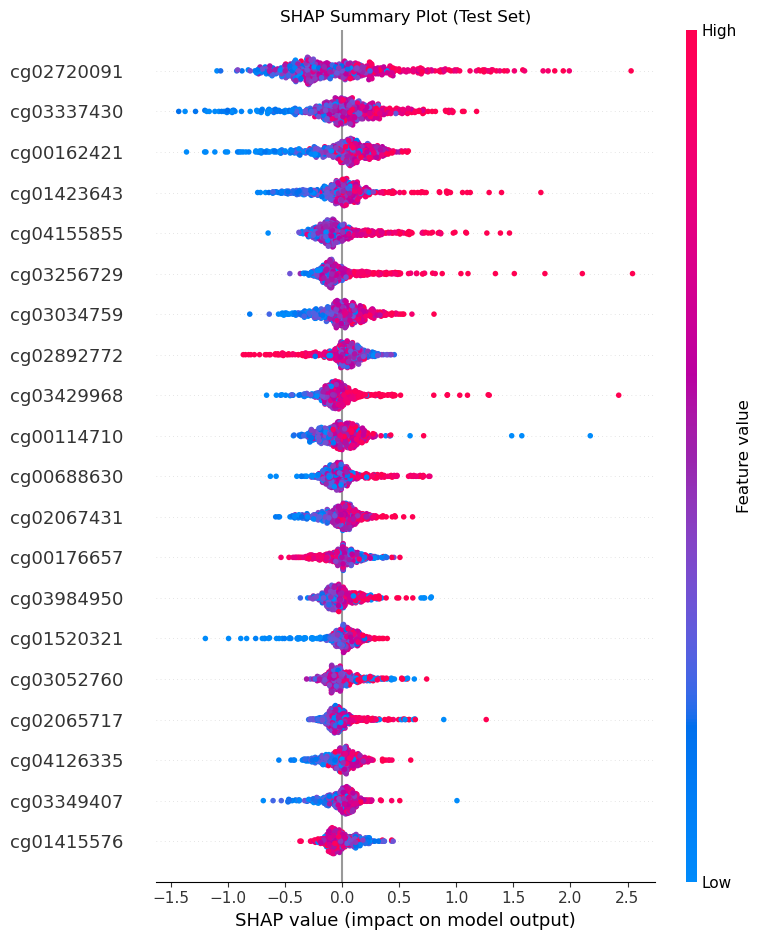

In [71]:
# SHAP summary plot
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot (Test Set)")
plt.tight_layout()
plt.savefig("shap_summary_test.png", dpi=300)
plt.show() 

Summary plot (bar plot): shows the average contribution of each CpG to the Random Forest predictions, ranking them by importance using SHAP values.

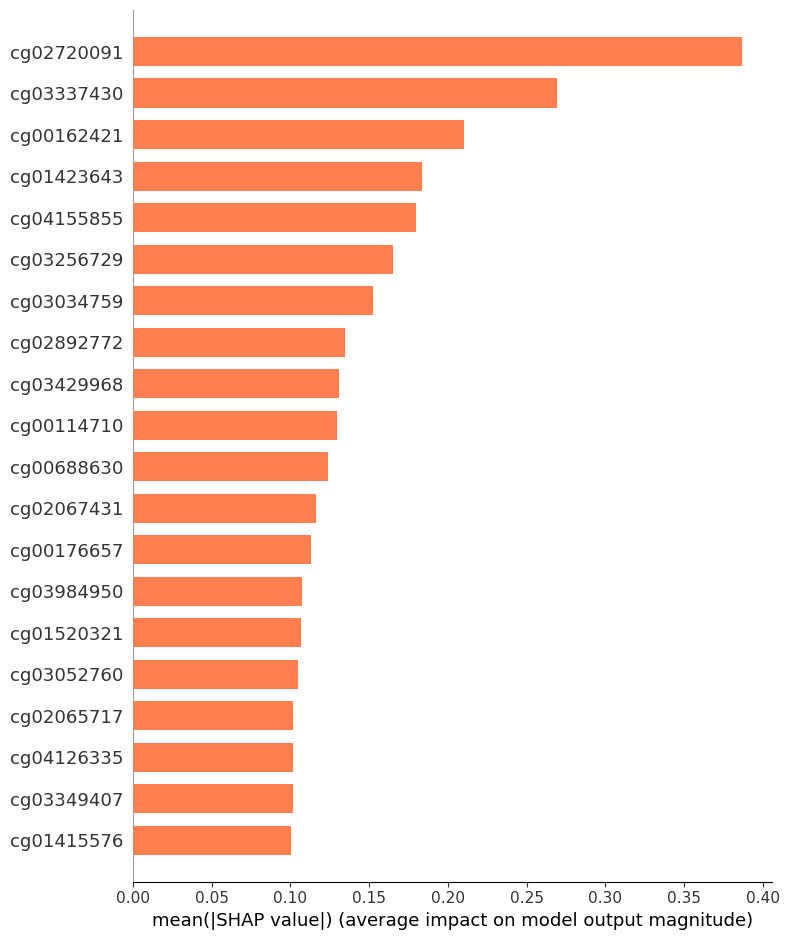

In [78]:
shap.summary_plot(shap_values, X_test, plot_type="bar",color="coral")